# Project: Stock Market Analysis and Prediction

## Stock Market Data From Google Finance

### Introduction

   Stock Market Analysis and Prediction is the project on technical analysis, visualization and prediction using data provided by Google Finance. By looking at data from the stock market, particularly some giant technology stocks and others. Used pandas to get stock information, visualize different aspects of it, and finally looked at a few ways of analyzing the risk of a stock, based on its previous performance history. Predicted future stock prices through a Monte Carlo method!
   
### Questions

In this analysis, I would like to explore the following questions.

1. What was the change in price of the stock over time?
2. What was the daily return of the stock on average?
3. What was the moving average of the various stocks?
4. What was the correlation between different stocks' closing prices?
4. What was the correlation between different stocks' daily returns?
5. How much value do we put at risk by investing in a particular stock?
6. How can we attempt to predict future stock behavior?

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'

# For Data Processing
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Data Visualization
import matplotlib.pylab as plt
import seaborn as sns
sns.set_style('whitegrid')


In [2]:
# For reading stock data from yahoo
from pandas_datareader import DataReader

# For time stamps
from datetime import datetime

#### Section 1 - Basic Analysis of Stock Information


In this section I'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.


In [3]:
# List of Tech_stocks for analytics
tech_list = ['AAPL','GOOGL','MSFT','AMZN']

# set up Start and End time for data grab
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

#For-loop for grabing google finance data and setting as a dataframe
# Set DataFrame as the Stock Ticker

for stock in tech_list:
    globals()[stock] = DataReader(stock,'morningstar',start,end)

Quick note: Using globals() is a sloppy way of setting the DataFrame names, but its simple

Let's go ahead and play aorund with the AAPL(Apple) Stock DataFrame to get a feel for the data.

KeyError: 'Date'

In [4]:
# Summery stats for Apple Stock
AAPL.describe()

,Close,High,Low,Open,Volume
count,261.000000,261.000000,261.000000,261.000000,2.610000e+02
mean,165.022989,166.284418,163.711923,165.011151,2.938378e+07
std,11.558636,11.596752,11.515312,11.474279,1.357615e+07
min,142.270000,143.500000,142.200000,142.900000,0.000000e+00
25%,155.900000,157.280000,155.020000,156.070000,2.120710e+07
50%,166.720000,168.441700,164.770000,166.834800,2.636853e+07
75%,174.250000,175.060000,173.040000,174.000000,3.527376e+07
max,190.040000,190.370000,187.860000,189.490000,8.659382e+07


In [6]:
# General Info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 261 entries, (AAPL, 2017-05-25 00:00:00) to (AAPL, 2018-05-24 00:00:00)
Data columns (total 5 columns):
Close     261 non-null float64
High      261 non-null float64
Low       261 non-null float64
Open      261 non-null float64
Volume    261 non-null int64
dtypes: float64(4), int64(1)
memory usage: 13.1+ KB


Now that we've seen the DataFrame, let's go ahead and plot out the volume and closing price of the AAPL(Apple) stocks.

Text(0,0.5,'Close')

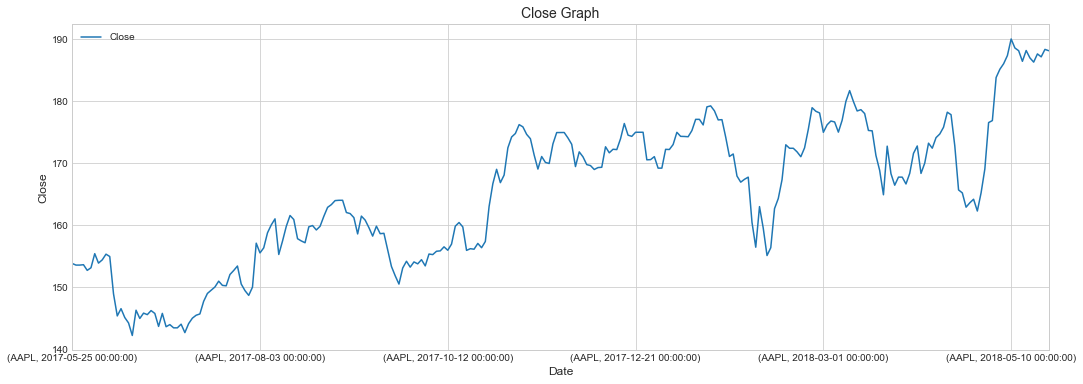

In [7]:
# Let's see a historical view of the closing price
AAPL['Close'].plot(legend=True, figsize=(17.5,6))
plt.style.use('ggplot')
plt.title('Close Graph', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close', fontsize=12)
#plt.savefig('./images/A.png', transparent=True, bbox_inches='tight')

Text(0,0.5,'Volume')

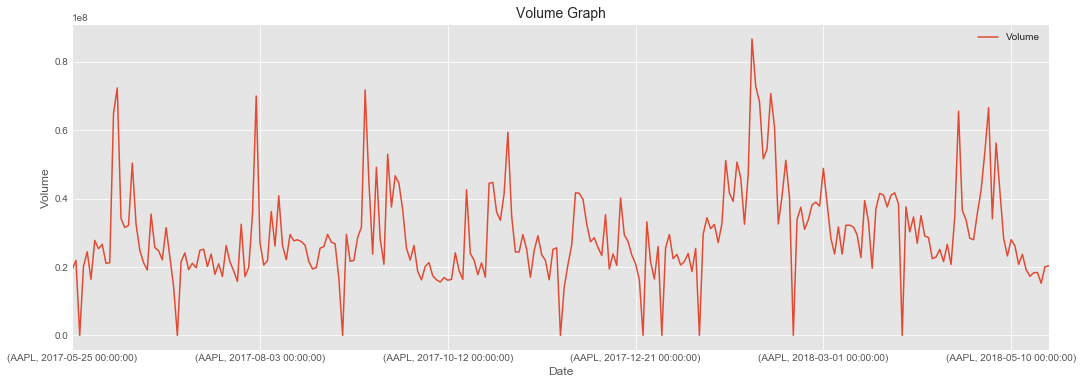

In [8]:
# Now let's plot the total volume of stock being traded each day over the past year

AAPL['Volume'].plot(legend=True, figsize=(17.5,6))
plt.style.use('ggplot')
plt.title('Volume Graph', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volume', fontsize=12)
#plt.savefig('./images/B.png', transparent=True, bbox_inches='tight')

We can see that on Feb'2017 was the higher for AAPL stock being traded.

Now that we've seen the visualizations for the closing price and the volume traded each day for AAPL stock.
Let's go ahead and caculate the moving average for the AAPL stock.


For more info on the Moving Average(SMA & EMA) check out the following links:

1.) http://www.investopedia.com/terms/m/movingaverage.asp

2.) http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

In [9]:
# Pandas has a built-in rolling mean calculator

# Let's go ahead and plot out several moving averages
MA_day = [10,20,50,100]

for ma in MA_day:
    column_name = 'MA for %s days' %(str(ma))
    globals()['AAPL'][column_name] = DataFrame.rolling(globals()['AAPL']['Close'],ma)

Now, lets plot all the additional Moving Averages for AAPL stock

Text(0,0.5,'Rolling Mean')

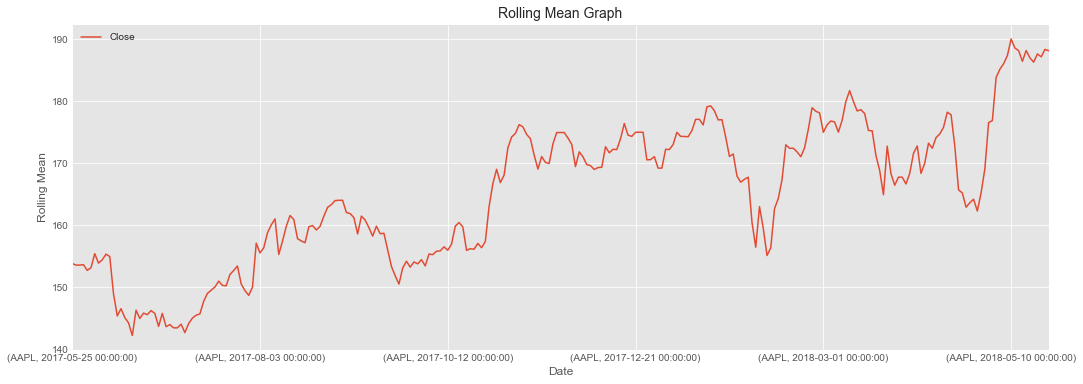

In [10]:
AAPL[['Close','MA for 10 days','MA for 20 days','MA for 50 days','MA for 100 days']].plot(subplots=False,figsize=(17.5,6))
plt.style.use('ggplot')
plt.title('Rolling Mean Graph', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Rolling Mean', fontsize=12)
#plt.savefig('./images/C.png', transparent=True, bbox_inches='tight')

#### Section 2 - Daily Return Analysis


Now, that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. 


In order to do so, we need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve the daily returns for the APPL stock.


-0.0011148863877681325

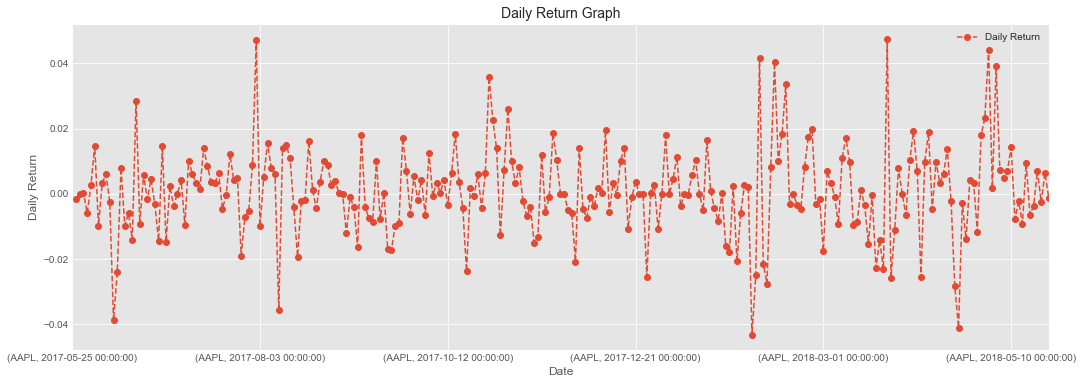

In [11]:
# We'll use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Close'].pct_change()

# Lets plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(17.5,6), legend=True, linestyle='--', marker='o')
plt.style.use('ggplot')
plt.title('Daily Return Graph', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Return', fontsize=12)
#plt.savefig('./images/D.png', transparent=True, bbox_inches='tight')
AAPL['Daily Return'].iloc[-1]

Great, now let's get an overall look at the average daily return using a histogram. By using seaborn to create both a histogram and kde plot on the same figure.

Text(0,0.5,'Daily Return')

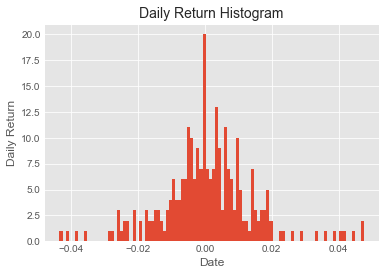

In [13]:
# only with histogram
AAPL['Daily Return'].hist(bins=100, figsize=(17.5,6))
plt.style.use('ggplot')
plt.title('Daily Return Histogram', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Return', fontsize=12)
#plt.savefig('./images/E.png', transparent=True, bbox_inches='tight')

Text(0,0.5,'Daily Return')

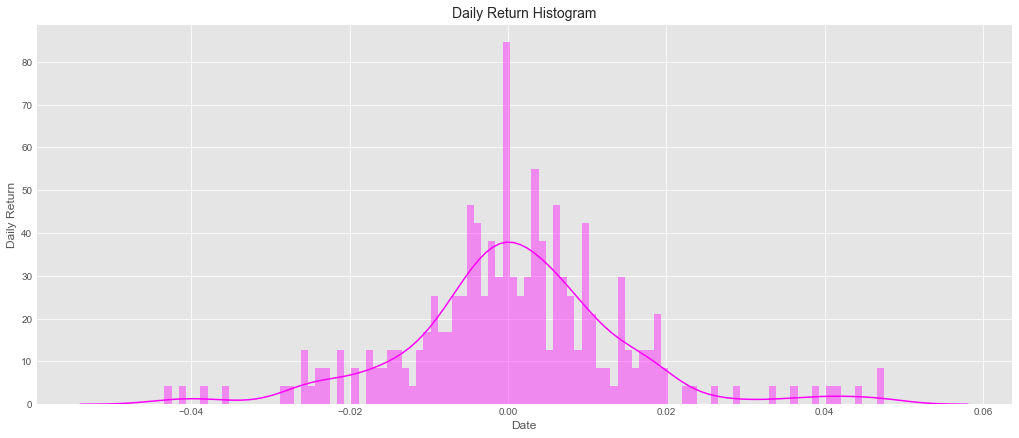

In [20]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(17.5, 7))
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='magenta')

plt.style.use('ggplot')

plt.title('Daily Return Histogram', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Return', fontsize=12)

#plt.savefig('./images/F.png', transparent=True, bbox_inches='tight')

Now what if we wanted to analyze the returns of all the stocks in our list? For that, we need to build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [14]:
# Grab all the closing prices for the tech stock list into one DataFrame

closingprice = DataReader(tech_list, 'morningstar', start, end)['Close']
closingprice_df = closingprice.to_frame().reset_index()

In [15]:
closingprice.head(10)

Symbol  Date      
AAPL    2017-05-24    153.34
        2017-05-25    153.87
        2017-05-26    153.61
        2017-05-29    153.61
        2017-05-30    153.67
        2017-05-31    152.76
        2017-06-01    153.18
        2017-06-02    155.45
        2017-06-05    153.93
        2017-06-06    154.45
Name: Close, dtype: float64

Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the APPL stock.

In [16]:
# make a new tech returns DataFrame
tech_returns = closingprice.pct_change()
tech_returns_df = tech_returns.to_frame().reset_index()
print(type(tech_returns_df))

<class 'pandas.core.frame.DataFrame'>


In [17]:
tech_returns.head()

Symbol  Date      
AAPL    2017-05-24         NaN
        2017-05-25    0.003456
        2017-05-26   -0.001690
        2017-05-29    0.000000
        2017-05-30    0.000391
Name: Close, dtype: float64

Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a stock compared to itself.

##### GOOGL is a Alphabet Inc Class A Stock.

Text(336.971,0.5,'Daily Return')

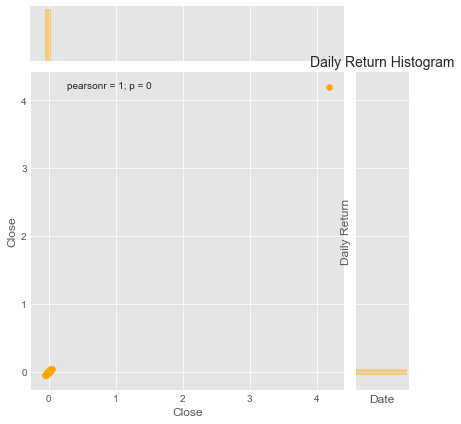

In [18]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOGL','GOOGL',tech_returns,kind='scatter',color='orange')
plt.style.use('ggplot')
plt.title('Daily Return Histogram', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Return', fontsize=12)
#plt.savefig('./images/G.png', transparent=True, bbox_inches='tight')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. 

So let's go ahead and compare Google and Amazon the same way.

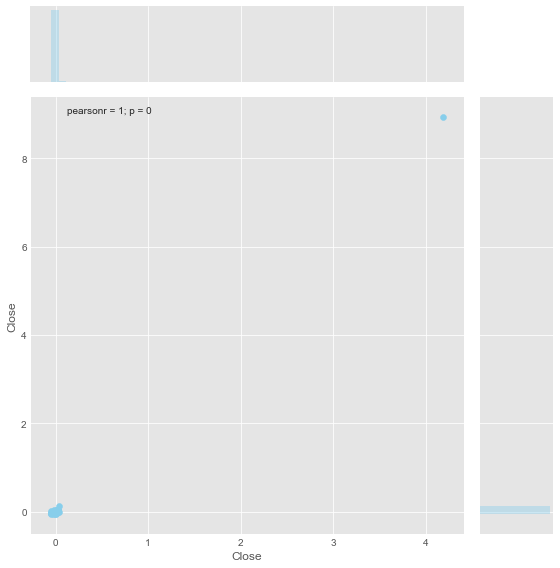

In [19]:
# We'll use joinplot to compare the daily returns of Google and Amazon.

sns.jointplot('GOOGL','AMZN',tech_returns, kind='scatter',size=8, color='skyblue')
#plt.savefig('./images/H.png', transparent=True, bbox_inches='tight')

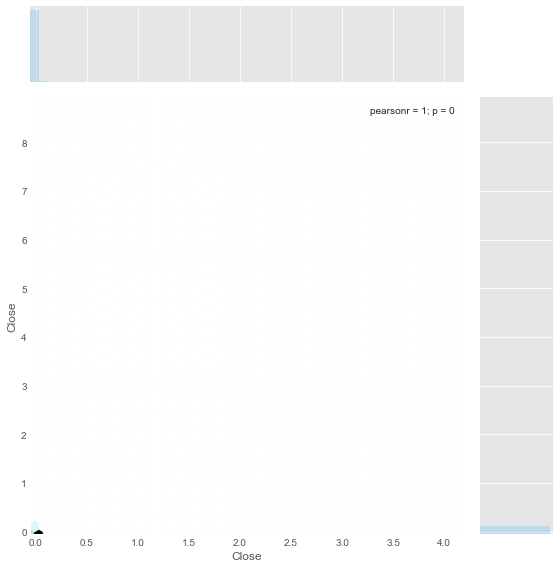

In [20]:
# with Hex plot
sns.jointplot('GOOGL','AMZN',tech_returns, kind='hex',size=8, color='skyblue')
#plt.savefig('./images/I.png', transparent=True, bbox_inches='tight')

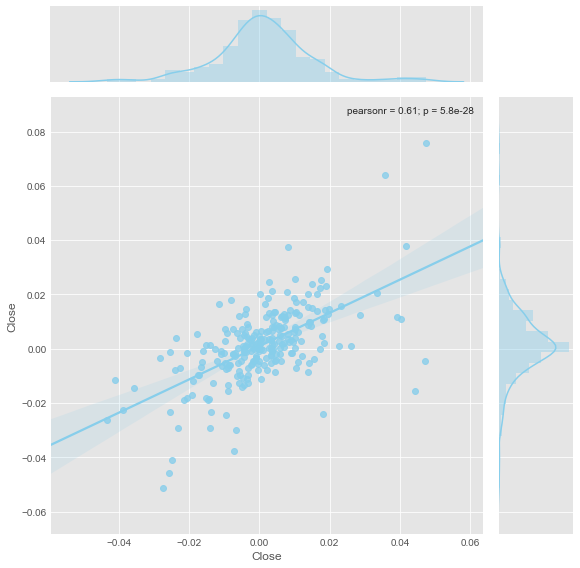

In [21]:
# Lets check out for Apple and Microsoft with reg jointplot
sns.jointplot('AAPL','MSFT',tech_returns, kind='reg', size=8, color='skyblue')
#plt.savefig('./images/J.png', transparent=True, bbox_inches='tight')

Intersting, the pearsonr value (officially known as the Pearson product-moment correlation coefficient) can give you a sense of how correlated the daily percentage returns are. You can find more information about it at this link:

Url - http://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient

But for a quick intuitive sense, check out the picture below.

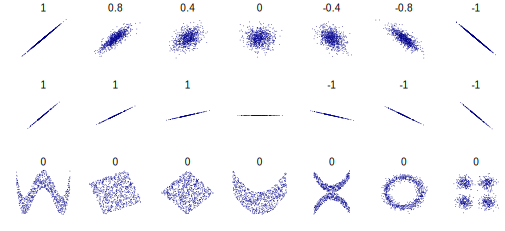

In [22]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

Seaborn and Pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

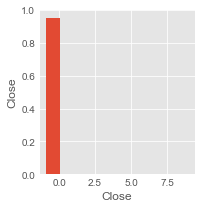

In [23]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_returns_df.dropna(),size=3)

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. 

Below is an example of utilizing the full power of seaborn to achieve this result.

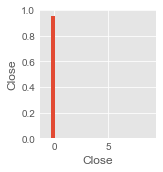

In [24]:
# Set up the figure by naming it returns_fig, call PairGrid on the DataFrame
returns_fig = sns.PairGrid(tech_returns_df.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, including the plot type (kde) & the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

We can also analyze the correlation of the closing prices using this exact same technique. Here it is shown, the code repeated from above with the exception of the DataFrame called.

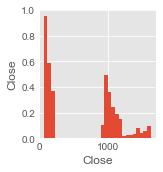

In [25]:
# Set up the figure by naming it returns_fig, call PairGrid on the DataFrame
returns_fig = sns.PairGrid(closingprice_df.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, including the plot type (kde) & the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we can also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Google and Amazon stocks.

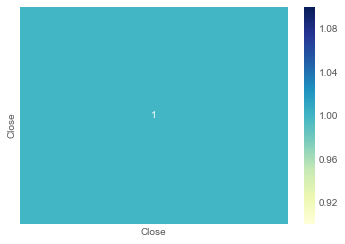

In [26]:
# Let's go ahead and use seaborn for a quick heatmap to get correlation for the daily return of the stocks.
sns.heatmap(tech_returns_df.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

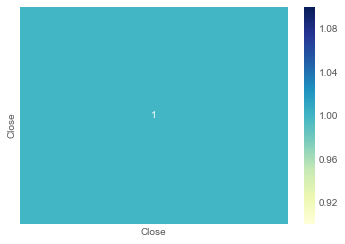

In [27]:
# Lets check out the correlation between closing prices of stocks
sns.heatmap(closingprice_df.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

##### Fantastic! Just like we suspected in our PairPlot we see here numerically and visually that Amazon and Google had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

Great! Now that we've done some daily return analysis, let's go ahead and start looking deeper into actual risk analysis.

### Risk Analysis

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns(Risk).

In [28]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_returns DataFrame
rets = tech_returns.dropna()
rets_df = rets.to_frame().reset_index()

In [29]:
rets.head()

Symbol  Date      
AAPL    2017-05-25    0.003456
        2017-05-26   -0.001690
        2017-05-29    0.000000
        2017-05-30    0.000391
        2017-05-31   -0.005922
Name: Close, dtype: float64

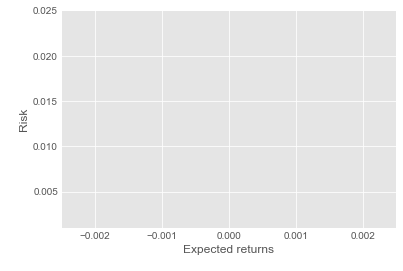

In [30]:
# Defining the area for the circles of scatter plot to avoid tiny little points
area = np.pi*20

plt.scatter(rets_df.mean(),rets_df.std(),s=area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.xlim([-0.0025,0.0025])
plt.ylim([0.001,0.025])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets_df.columns, rets_df.mean(), rets_df.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = 'fancy', connectionstyle = 'arc3,rad=-0.3'))

By looking at the scatter plot we can say these stocks have lower risk and positive expected returns.

### Value at Risk

Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. There's several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.

#### Value at risk using the "bootstrap" method
For this method we will calculate the empirical quantiles from a histogram of daily returns. For more information on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

Let's go ahead and repeat the daily returns histogram for Apple stock.

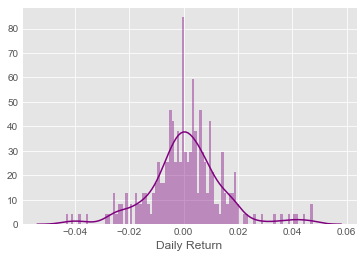

In [31]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

Now we can use quantile to get the risk value for the stock.

In [32]:
# The 0.05 empirical quantile of daily returns

# For APPL stocks
rets["AAPL"].quantile(0.05)

-0.022679745200913027

The 0.05 empirical quantile of daily returns is at -0.016. That means that with 95% confidence, our worst daily loss will not exceed 1.6%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.016 * 1,000,000 = $16,000.

In [33]:
# For AMZN stocks
rets["AMZN"].quantile(0.05)

-0.02481835564053536

In [34]:
# For GOOGL stocks
rets["GOOGL"].quantile(0.05)

-0.024367764203556797

In [35]:
# For MSFT stocks
rets["MSFT"].quantile(0.05)

-0.02265462126476736

#### Value at Risk using the Monte Carlo method
Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.


Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each time period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

For more info on the Monte Carlo method for stocks and simulating stock prices with GBM model ie. geometric Brownian motion (GBM).

check out the following link: http://www.investopedia.com/articles/07/montecarlo.asp

To demonstrate a basic Monte Carlo method, we will start with just a few simulations. First we'll define the variables we'll be using in the Google stock DataFrame GOOGL


In [36]:
rets.head()

Symbol  Date      
AAPL    2017-05-25    0.003456
        2017-05-26   -0.001690
        2017-05-29    0.000000
        2017-05-30    0.000391
        2017-05-31   -0.005922
Name: Close, dtype: float64

In [37]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for GOOGL
mu = rets_df.mean()
mu_d = mu.to_frame().reset_index()
# Now let's grab the volatility of the stock from the std() of the average return for GOOGL
sigma = rets_df.std()
sigma_d = sigma.to_frame().reset_index()

Next, we will create a function that takes in the starting price and number of days, and uses the sigma and mu we already calculated form our daily returns.

In [38]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

Awesome! Now lets put above function to work.

In [39]:
# For Google Stock - GOOGL
GOOGL.head()

Close     High       Low    Open   Volume
Symbol Date                                                  
GOOGL  2017-05-24  977.61  978.115  971.6299  975.26  1142488
       2017-05-25  991.86  995.780  977.8200  979.00  1954149
       2017-05-26  993.27  996.390  987.3600  992.00  1636416
       2017-05-29  993.27  993.270  993.2700  993.27        0
       2017-05-30  996.17  997.620  991.3601  992.50  1516685

Text(0.5,1,'Monte Carlo Analysis for Google')

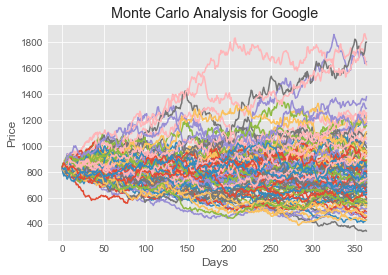

In [40]:
start_price = 830.09

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [41]:
# For Amazon Stock - AMZN
AMZN.head()

Close     High       Low    Open   Volume
Symbol Date                                                  
AMZN   2017-05-24  980.35   981.00  970.2300  976.00  2463052
       2017-05-25  993.38   999.00  982.1100  984.85  4822032
       2017-05-26  995.78   998.65  989.2491  995.00  3469154
       2017-05-29  995.78   995.78  995.7800  995.78        0
       2017-05-30  996.70  1001.20  995.5200  996.51  3263069

Text(0.5,1,'Monte Carlo Analysis for Amazon')

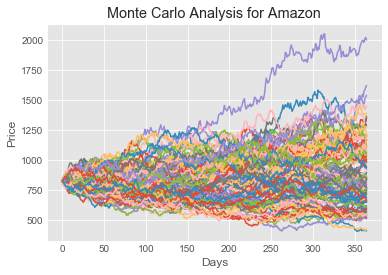

In [42]:
start_price = 824.95

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Amazon')

In [43]:
# For Apple Stock - AAPL
AAPL.head()

Close    High     Low    Open    Volume  \
Symbol Date                                                   
AAPL   2017-05-24  153.34  154.17  152.67  153.84  19219154   
       2017-05-25  153.87  154.35  153.03  153.73  19235598   
       2017-05-26  153.61  154.24  153.31  154.00  21927637   
       2017-05-29  153.61  153.61  153.61  153.61         0   
       2017-05-30  153.67  154.43  153.33  153.42  20126851   

                                            MA for 10 days  \
Symbol Date                                                  
AAPL   2017-05-24  Rolling [window=10,center=False,axis=0]   
       2017-05-25  Rolling [window=10,center=False,axis=0]   
       2017-05-26  Rolling [window=10,center=False,axis=0]   
       2017-05-29  Rolling [window=10,center=False,axis=0]   
       2017-05-30  Rolling [window=10,center=False,axis=0]   

                                            MA for 20 days  \
Symbol Date                                                  
AAPL   2017-05-24  Rolling [window=20,center=False,axis=0]   
       2017-05-25  Rolling [window=20,center=False,axis=0]   
       2017-05-26  Rolling [window=20,center=False,axis=0]   
       2017-05-29  Rolling [window=20,center=False,axis=0]   
       2017-05-30  Rolling [window=20,center=False,axis=0]   

                                            MA for 50 days  \
Symbol Date                                                  
AAPL   2017-05-24  Rolling [window=50,center=False,axis=0]   
       2017-05-25  Rolling [window=50,center=False,axis=0]   
       2017-05-26  Rolling [window=50,center=False,axis=0]   
       2017-05-29  Rolling [window=50,center=False,axis=0]   
       2017-05-30  Rolling [window=50,center=False,axis=0]   

                                            MA for 100 days  Daily Return  
Symbol Date                                                                
AAPL   2017-05-24  Rolling [window=100,center=False,axis=0]           NaN  
       2017-05-25  Rolling [window=100,center=False,axis=0]      0.003456  
       2017-05-26  Rolling [window=100,center=False,axis=0]     -0.001690  
       2017-05-29  Rolling [window=100,center=False,axis=0]      0.000000  
       2017-05-30  Rolling [window=100,center=False,axis=0]      0.000391

Text(0.5,1,'Monte Carlo Analysis for Apple')

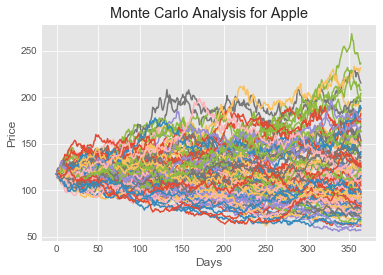

In [44]:
start_price = 117.10

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Apple')

In [45]:
# For Microsoft Stock - MSFT
MSFT.head()

Close   High    Low   Open    Volume
Symbol Date                                            
MSFT   2017-05-24  68.77  68.88  68.45  68.87  14666865
       2017-05-25  69.62  69.88  68.91  68.97  21854095
       2017-05-26  69.96  70.22  69.52  69.80  19827923
       2017-05-29  69.96  69.96  69.96  69.96         0
       2017-05-30  70.41  70.41  69.77  69.79  17072838

Text(0.5,1,'Monte Carlo Analysis for Microsoft')

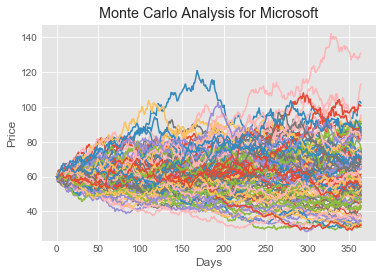

In [46]:
start_price = 59.94

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Microsoft')

Let's go ahead and get a histogram of the end results for a much larger run. (note: This could take a little while to run , depending on the number of runs chosen)

In [47]:
# Lets start with Google stock price
start_price = 830.09

# Set a large numebr of runs
runs = 100

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Now that we have our array of simulations, we can go ahead and plot a histogram ,as well as use qunatile to define our risk for this stock.

For more info on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

In [21]:

# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.figure(figsize=(17.5, 7))
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title(s="Final price distribution for Google Stock(GOOGL) after %s days" % days, weight='bold', color='Y')


NameError: name 'simulations' is not defined

Awesome! Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google Stock(GOOGL), which looks to be $17.98 for every investment of 
830.09 (The price of one initial Google Stock).

This basically means for every initial GOOGL stock you purchase you're putting about $17.98 at risk 99% of the time from our Monte Carlo Simulation.


##### Now lets plot remaining Stocks to estimate the VaR with our Monte Carlo Simulation.

In [49]:
# For Amazon Stock Price
start_price = 824.95

# Set a large numebr of runs
runs = 100

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

In [3]:

# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title(s="Final price distribution for Amazon Stock(AMZN) after %s days" % days, weight='bold', color='G')

NameError: name 'np' is not defined

This basically means for every initial AMZN stock you purchase you're putting about $18.13 at risk 99% of the time from our Monte Carlo Simulation.

In [51]:
# For Apple Stock Price
start_price = 117.10

# Set a large numebr of runs
runs = 100

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5,1,'Final price distribution for Apple Stock(AAPL) after 365 days')

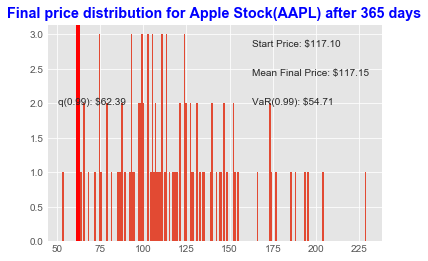

In [52]:

# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title(s="Final price distribution for Apple Stock(AAPL) after %s days" % days, weight='bold', color='B')

Great! This basically means for every initial AAPL stock you purchase you're putting about $2.48 at risk 99% of the time from our Monte Carlo Simulation.

In [53]:
# For Microsoft Stock Price
start_price = 59.94

# Set a large numebr of runs
runs = 100

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5,1,'Final price distribution for Microsoft Stock(MSFT) after 365 days')

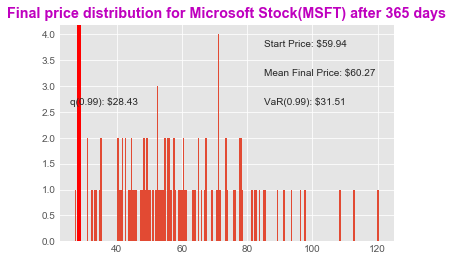

In [54]:
# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title(s="Final price distribution for Microsoft Stock(MSFT) after %s days" % days, weight='bold', color='M')

Nice, This basically means for every initial MSFT stock you purchase you're putting about $1.28 at risk 99% of the time from our Monte Carlo Simulation.

Now lets estiamte the Value at Risk(VaR) for a stock related to other domains.


We'll estimate the VaR for:
 - Johnson & Johnson > JNJ (U.S.: NYSE) [JNJ](http://quotes.wsj.com/JNJ)
 - Wal-Mart Stores Inc. > WMT (U.S.: NYSE) [WMT](http://quotes.wsj.com/WMT)
 - Nike Inc. > NKE (U.S.: NYSE) [NKE](http://quotes.wsj.com/NKE)
 

By using the above methods to get Value at Risk.

In [55]:
# List of NYSE_stocks for analytics
NYSE_list = ['JNJ','NKE','WMT']

# set up Start and End time for data grab
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

#For-loop for grabing google finance data and setting as a dataframe
# Set DataFrame as the Stock Ticker

for stock in NYSE_list:
    globals()[stock] = DataReader(stock,'morningstar',start,end)

Let's go ahead and play aorund with the JNJ(Johnson & Johnson) Stock DataFrame to get a feel for the data.

In [56]:
JNJ.head()

Close      High     Low    Open   Volume
Symbol Date                                                 
JNJ    2017-05-24  127.51  128.0000  127.29  127.79  3967685
       2017-05-25  127.53  127.6200  126.33  126.74  5294213
       2017-05-26  126.92  127.6700  126.83  127.23  4005009
       2017-05-29  126.92  126.9200  126.92  126.92        0
       2017-05-30  127.11  127.3901  126.19  126.70  3665353

In [57]:
JNJ.describe()

,Close,High,Low,Open,Volume
count,261.000000,261.000000,261.000000,261.000000,2.610000e+02
mean,133.945172,134.877208,133.086595,134.011379,6.050871e+06
std,5.669433,5.627083,5.768920,5.660908,2.764931e+06
min,122.610000,123.490000,121.280000,122.600000,0.000000e+00
25%,130.360000,131.200000,129.380000,130.220000,4.516193e+06
50%,132.860000,133.580000,132.100000,132.870000,5.724183e+06
75%,139.330000,140.130000,138.480000,139.360000,6.827734e+06
max,148.140000,148.320000,146.720000,147.840000,1.995414e+07


In [58]:
JNJ.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 261 entries, (JNJ, 2017-05-24 00:00:00) to (JNJ, 2018-05-23 00:00:00)
Data columns (total 5 columns):
Close     261 non-null float64
High      261 non-null float64
Low       261 non-null float64
Open      261 non-null float64
Volume    261 non-null int64
dtypes: float64(4), int64(1)
memory usage: 13.1+ KB


Now that we've seen the DataFrame, let's go ahead and plot out the closing prices of NYSE stocks.

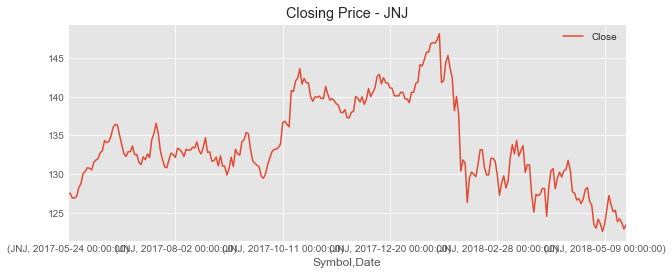

In [59]:
# Let's see a historical view of the closing price for JNJ(Johnson & Johnson)
JNJ['Close'].plot(title='Closing Price - JNJ',legend=True, figsize=(10,4))

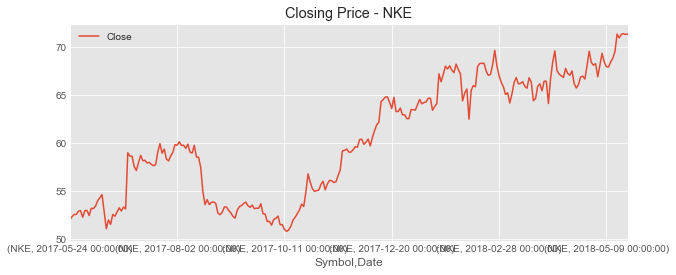

In [60]:
# Let's see a historical view of the closing price for NKE(Nike Inc.)
NKE['Close'].plot(title='Closing Price - NKE',legend=True, figsize=(10,4))

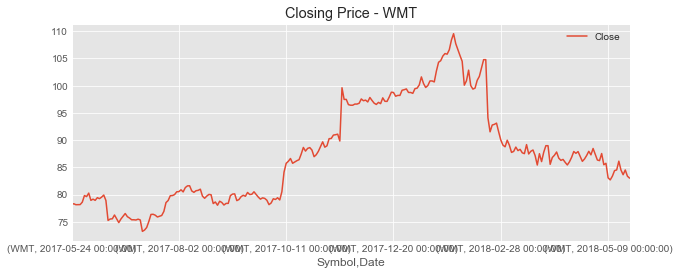

In [61]:
# Let's see a historical view of the closing price for WMT(Wal-Mart Stores Inc.)
WMT['Close'].plot(title='Closing Price - WMT',legend=True, figsize=(10,4))

### Value at risk using the "Bootstrap" method

we will calculate the empirical quantiles from a histogram of daily returns.

Let's go ahead and use pandas to retrieve the daily returns for the JNJ, WMT & NKE stock.

In [62]:
# We'll use pct_change to find the percent change for each day

#For JNJ stocks
JNJ['Daily Return'] = JNJ['Close'].pct_change()

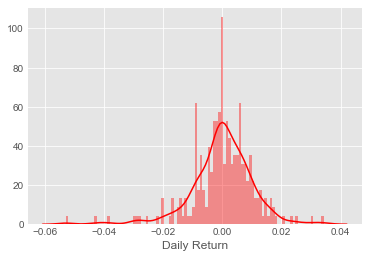

In [63]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(JNJ['Daily Return'].dropna(),bins=100,color='R')

In [64]:
(JNJ['Daily Return'].dropna()).quantile(0.05)

-0.01700428159667746

The 0.05 empirical quantile of JNJ stock daily returns is at -0.010. That means that with 95% confidence, our worst daily loss will not exceed 1%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.010 * 1,000,000 = $10,000.

In [65]:
# For WMT stocks
WMT['Daily Return'] = WMT['Close'].pct_change()

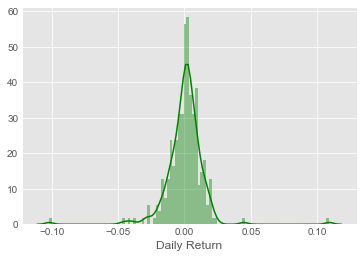

In [66]:
sns.distplot(WMT['Daily Return'].dropna(),bins=100,color='G')

In [67]:
(WMT['Daily Return'].dropna()).quantile(0.05)

-0.019053385257420126

The 0.05 empirical quantile of WMT stock daily returns is at -0.013. That means that with 95% confidence, our worst daily loss will not exceed 1.3%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.013 * 1,000,000 = $13,000.

In [68]:
# For NKE stocks
NKE['Daily Return'] = NKE['Close'].pct_change()

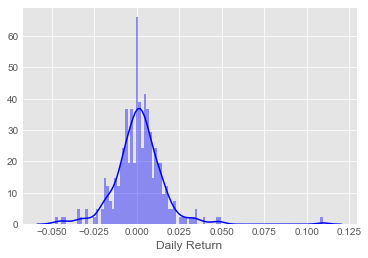

In [69]:
sns.distplot(NKE['Daily Return'].dropna(),bins=100,color='B')

In [70]:
(NKE['Daily Return'].dropna()).quantile(0.05)

-0.01943049706301725

The 0.05 empirical quantile of NKE stock daily returns is at -0.018. That means that with 95% confidence, our worst daily loss will not exceed 1.8%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.018 * 1,000,000 = $18,000.